In [2]:
import matplotlib.pyplot as plt

from series2graph import *
import numpy as np

In [3]:
import pandas as pd

df = pd.read_csv("../DATA/33761.ts",header=None)[:100000]

print("Time Series Statistics:")
print("Number of points: {}".format(len(df)))

Time Series Statistics:
Number of points: 2784


In [4]:
pattern_length = 75
query_length = 100

In [5]:
s2g = Series2Graph(pattern_length=pattern_length)
s2g.fit(df)

Text(0.5, 1.0, 'SProj(T,l,lambda)')

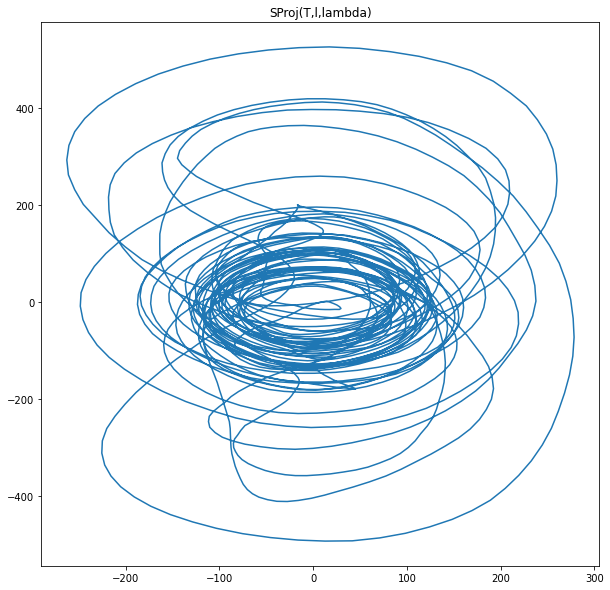

In [6]:
plt.figure(figsize=(10,10))
plt.plot(s2g.graph['proj_A']['0'],s2g.graph['proj_A']['1'])
plt.title("SProj(T,l,lambda)")

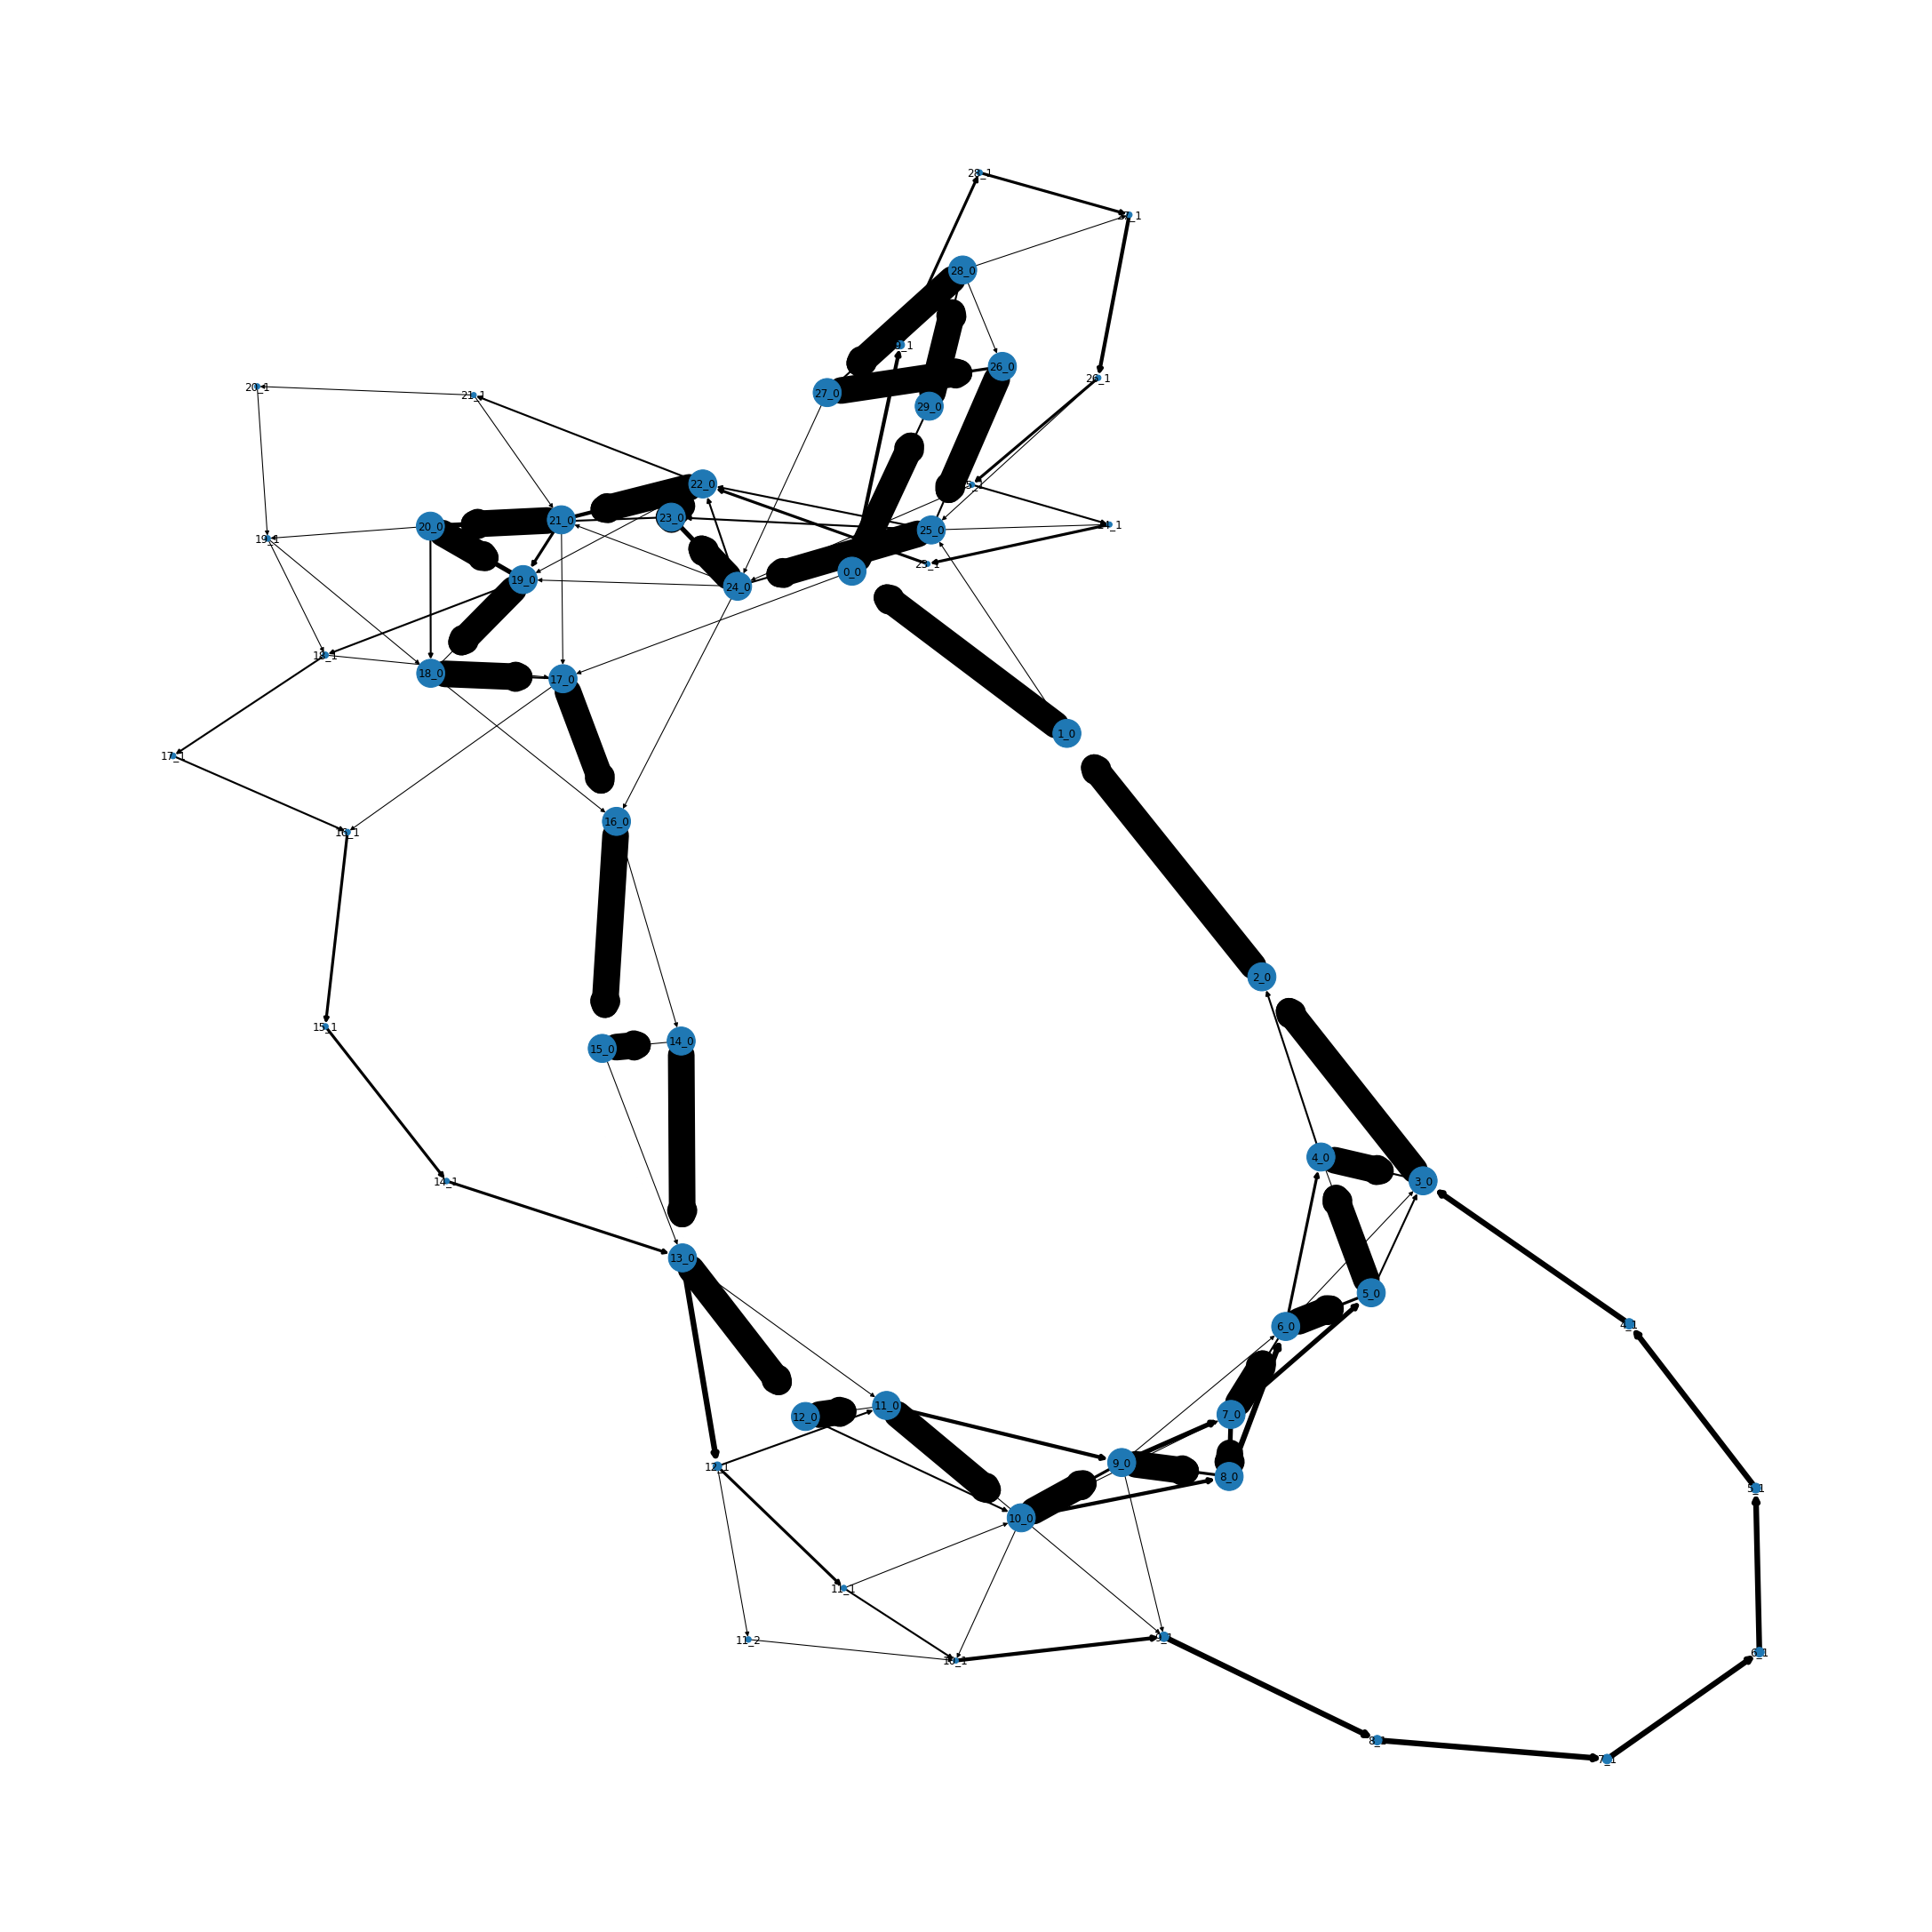

In [7]:
s2g.plot_graph()

In [11]:
s2g.score(query_length)

(0.0, 2582.0)

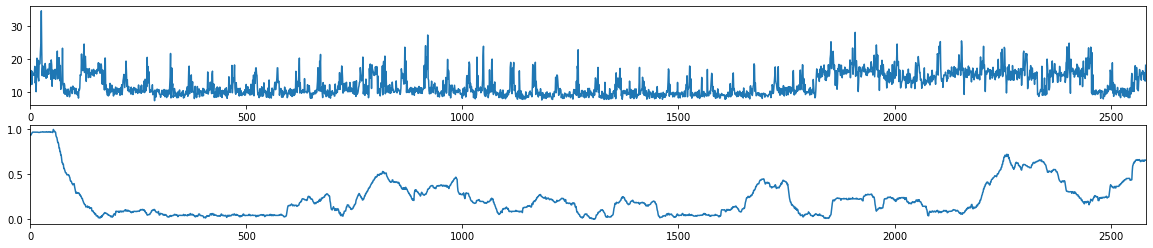

In [12]:
fig,ax = plt.subplots(2,1,figsize=(20,4))
ax[0].plot(df[0].values[0:len(s2g.all_score)])
ax[1].plot(s2g.all_score)
ax[0].set_xlim(0,len(s2g.all_score))
ax[1].set_xlim(0,len(s2g.all_score))
# ax[0].set_xlim(0,50)
# ax[1].set_xlim(0,50)


In [13]:
s2g.all_score


array([0.93916188, 0.93916188, 0.93656308, ..., 0.65989805, 0.65989805,
       0.65910684])

In [14]:
df[0].values


array([11.875227, 13.390115, 15.556544, ..., 15.144634, 13.21977 ,
       17.039476])

In [22]:
threshold = 0.6
anom_val = [];
anom_score = [];
for i in range(len(s2g.all_score)):
    if(s2g.all_score[i] > threshold):
        anom_val.append(df[0].values[i])
        anom_score.append(s2g.all_score[i])
    else: 
        anom_val.append(np.nan)
        anom_score.append(np.nan)

len(anom_val)        

2582

(0.0, 2582.0)

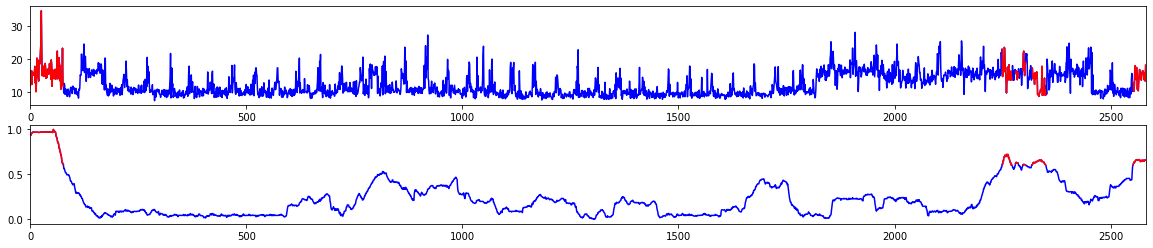

In [23]:
fig,ax = plt.subplots(2,1,figsize=(20,4))
ax[0].plot(df[0].values[0:len(anom_val)],color='blue')
ax[0].plot(anom_val[0:len(anom_val)],color='red')

ax[1].plot(s2g.all_score,color='blue')
ax[1].plot(anom_score,color='red')
ax[0].set_xlim(0,len(anom_score))
ax[1].set_xlim(0,len(anom_score))